In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import sys
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + "/../")

import bfcnn
from bfcnn.utilities import *

2023-05-24 13:23:17,619 INFO __init__.py:<module>:81] pretrained directory [/home/arxwn/repositories/blind_image_denoising/bfcnn/pretrained] not found


In [2]:
# setup environment

tf.compat.v1.enable_eager_execution
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
# setup variables

INPUT_SHAPE = (None, None, 1)

IMAGE_PATH = "../images/test/etc/lena.jpg"

In [4]:
# create input for pyramids
x = \
    tf.keras.preprocessing.image.load_img(
        path=IMAGE_PATH,
        color_mode="grayscale",
        target_size=(256, 256))

x = tf.keras.preprocessing.image.img_to_array(x)
x = np.array([x])
x = ((x / 255.0) * 2.0) - 1.0

In [5]:
x_highpass = highpass_filter(input_layer=x, a=5.0, b=4.0)
x_lowpass = lowpass_filter(input_layer=x, a=5.0, b=4.0)

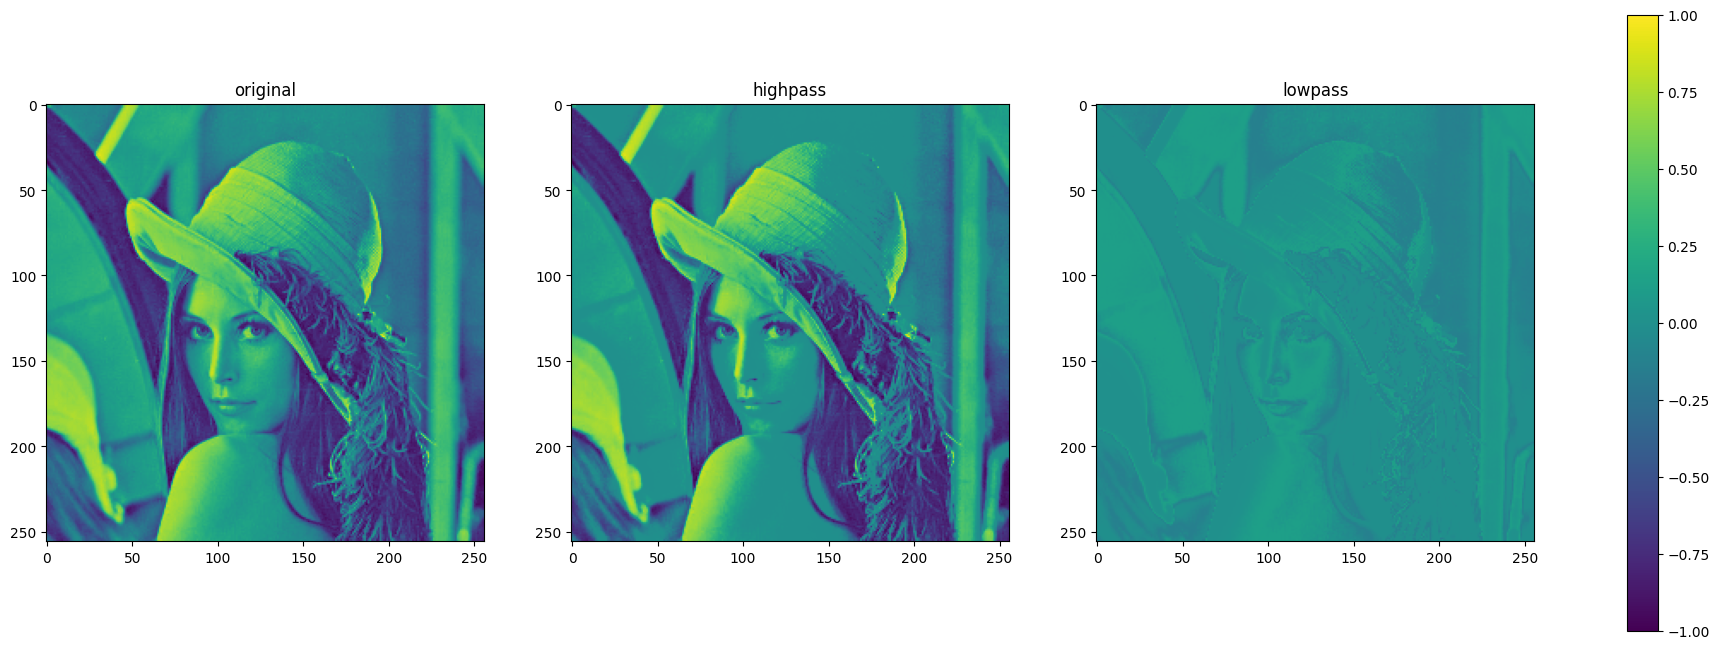

In [6]:
norm = plt.Normalize(-1,+1)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
# ---
im = axes[0].imshow(x[0,:,:,0], norm=norm)
axes[0].set_title(f"original")
# ---
im = axes[1].imshow(x_highpass[0,:,:,0], norm=norm)
axes[1].set_title(f"highpass")
# ---
im = axes[2].imshow(x_lowpass[0,:,:,0], norm=norm)
axes[2].set_title(f"lowpass")
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

In [26]:
random_filter_base = \
    tf.keras.layers.Conv2D(
                kernel_size=3,
                use_bias=False,
                activation="linear",
                filters=32,
                kernel_regularizer="l2",
                kernel_initializer="he_normal")(x)
random_filter = \
    tf.keras.layers.Conv2D(
                kernel_size=1,
                use_bias=False,
                activation="linear",
                filters=32,
                kernel_regularizer="l2",
                kernel_initializer="glorot_normal")(random_filter_base)

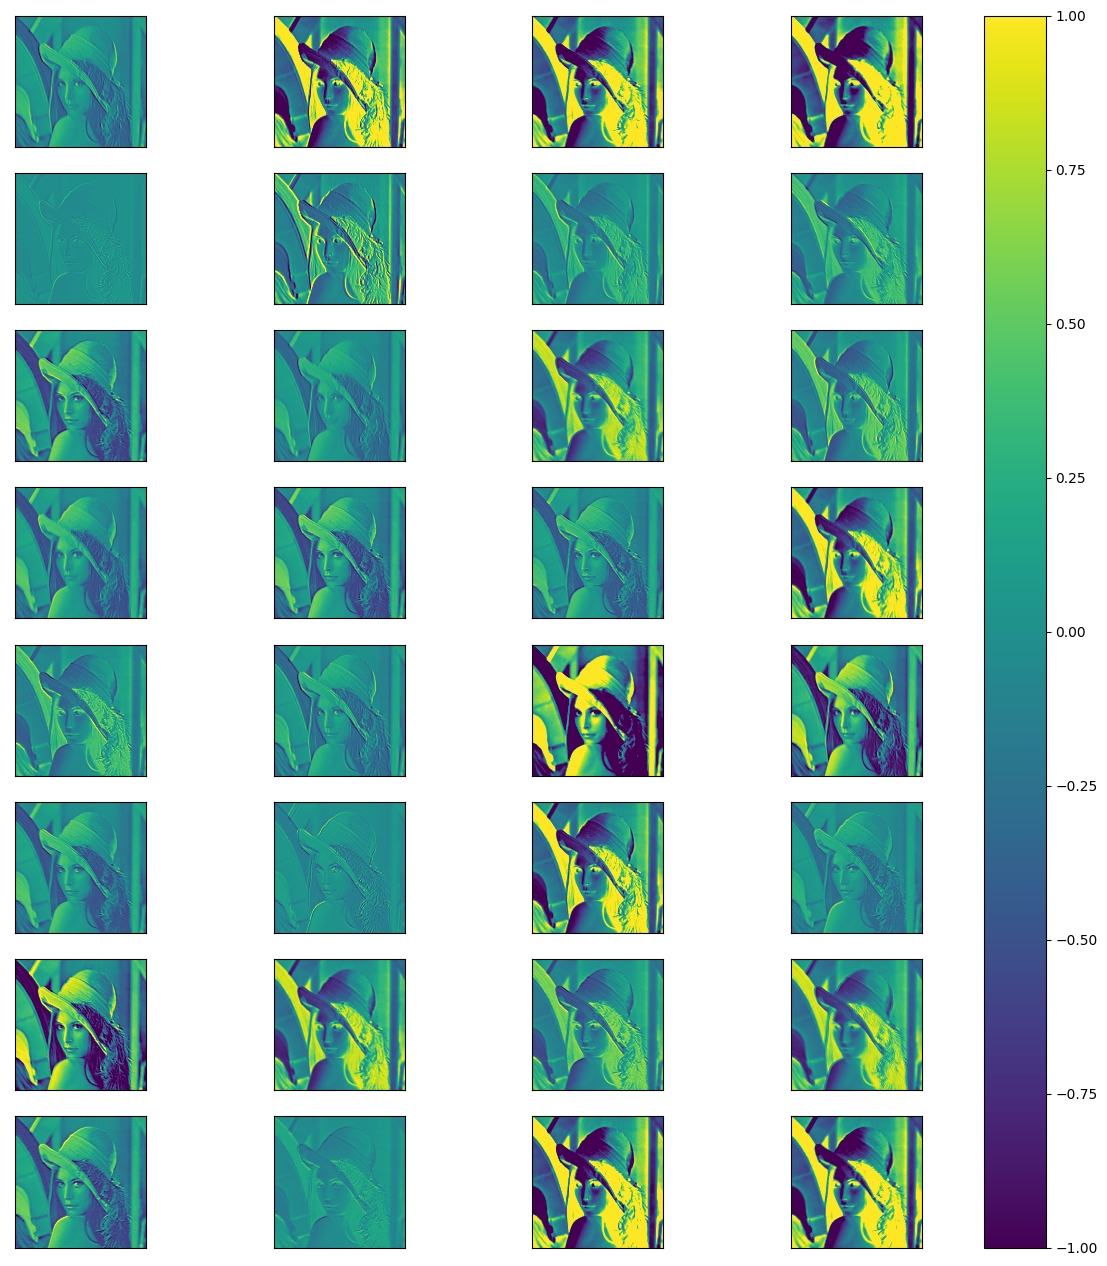

In [27]:
rows = 8
cols = 4
norm = plt.Normalize(-1,+1)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16,16))

for i in range(rows):
    for j in range(cols):
        no_filter = i * cols + j
        # ---
        im = axes[i,j].imshow(random_filter[0,:,:,no_filter], norm=norm)
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

In [31]:
x_highpass = highpass_filter(input_layer=random_filter, a=4.0, b=4.0)
x_lowpass = lowpass_filter(input_layer=random_filter, a=4.0, b=4.0)

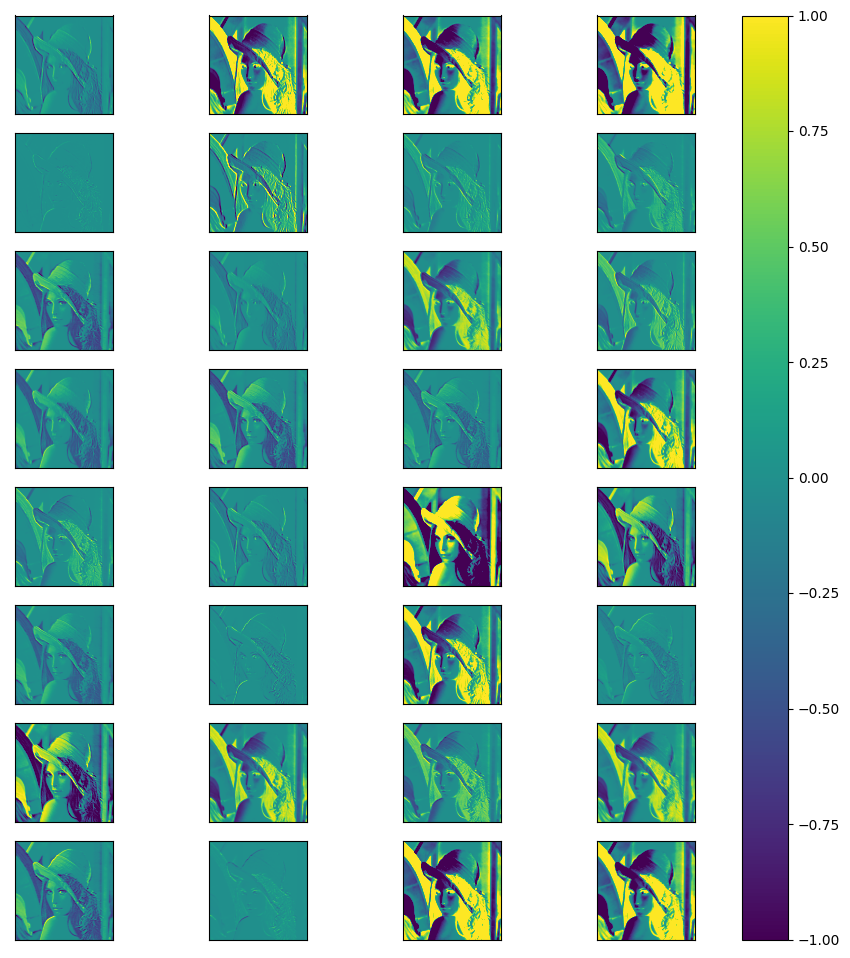

In [32]:
rows = 8
cols = 4
norm = plt.Normalize(-1,+1)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12,12))

for i in range(rows):
    for j in range(cols):
        no_filter = i * cols + j
        # ---
        im = axes[i,j].imshow(x_highpass[0,:,:,no_filter], norm=norm)
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

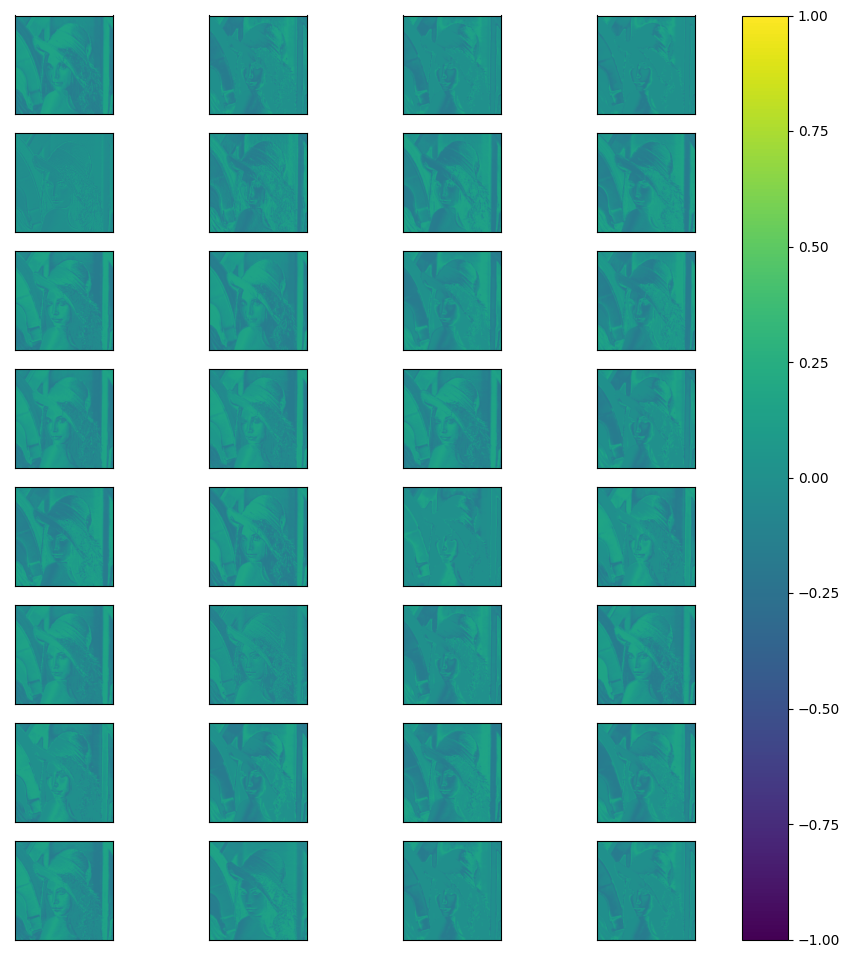

In [33]:
rows = 8
cols = 4
norm = plt.Normalize(-1,+1)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12,12))

for i in range(rows):
    for j in range(cols):
        no_filter = i * cols + j
        # ---
        im = axes[i,j].imshow(x_lowpass[0,:,:,no_filter], norm=norm)
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()